In [27]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime
import matplotlib.pyplot as plt

# Reading our Dataset

In [29]:
pd.set_option('display.max_columns', 50)

In [30]:
df_anime=pd.read_csv('/kaggle/input/anime-data/anime-dataset-2023.csv')
print("Shape of the Dataset:",df_anime.shape)
df_anime.head(3)

Shape of the Dataset: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


In [31]:
df_user=pd.read_csv('/kaggle/input/myanimelist-dataset/users-details-2023.csv')
print("Shape of the Dataset:",df_user.shape)
df_user.head()

Shape of the Dataset: (731290, 16)


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [32]:
df_score=pd.read_csv('/kaggle/input/myanimelist-dataset/users-score-2023.csv')
print("Shape of the dataset:",df_score.shape)
df_score.head()

Shape of the dataset: (24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


# Explorartory Data Analysis

## Data Exploration

In [33]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [34]:
df_anime['Score'].value_counts()

Score
UNKNOWN    9213
6.31         80
6.54         80
6.25         79
6.51         79
           ... 
3.05          1
3.14          1
3.61          1
3.29          1
2.76          1
Name: count, Length: 567, dtype: int64

In [35]:
scores = df_anime['Score'][df_anime['Score'] != 'UNKNOWN']
scores = scores.astype('float')
score_mean= round(scores.mean() , 2)

In [36]:
df_anime['Score'] = df_anime['Score'].replace('UNKNOWN', score_mean)
df_anime['Score'] = df_anime['Score'].astype('float64')

In [37]:
df_anime['Rank'].value_counts()

Rank
UNKNOWN    4612
0.0         187
18715.0       4
15259.0       4
11786.0       4
           ... 
1855.0        1
98.0          1
96.0          1
48.0          1
249.0         1
Name: count, Length: 15198, dtype: int64

In [38]:
df_anime['Rank'] = df_anime['Rank'].replace('UNKNOWN', np.nan)
df_anime['Rank'] = df_anime['Rank'].astype('float64')

In [39]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [40]:
df_score.isnull().sum()

user_id          0
Username       232
anime_id         0
Anime Title      0
rating           0
dtype: int64

## Data Visualization

### For Anime Dataset

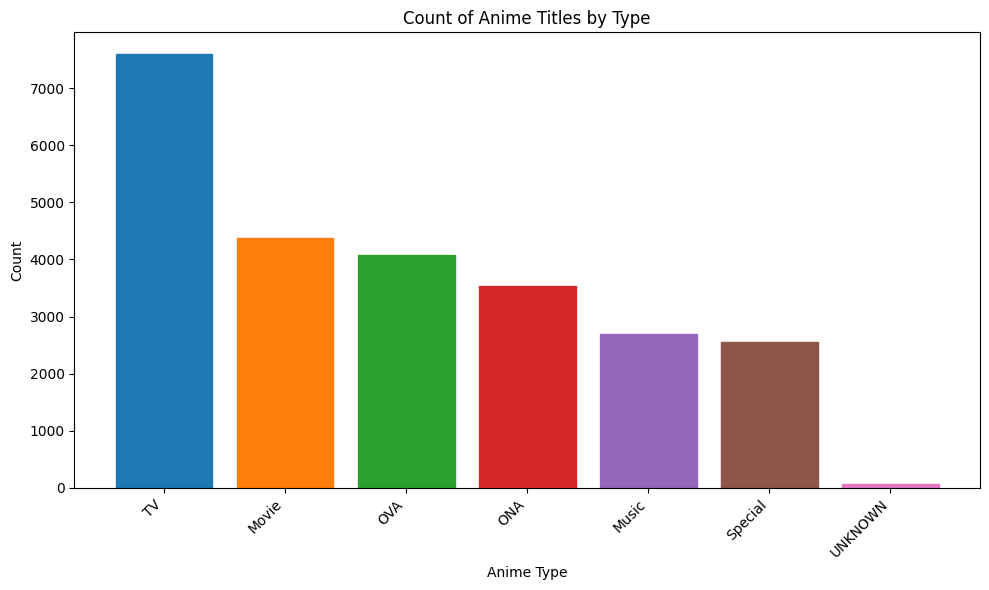

In [43]:
type_counts = df_anime['Type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values)

colors = plt.cm.tab10(range(len(type_counts)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.title('Count of Anime Titles by Type')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

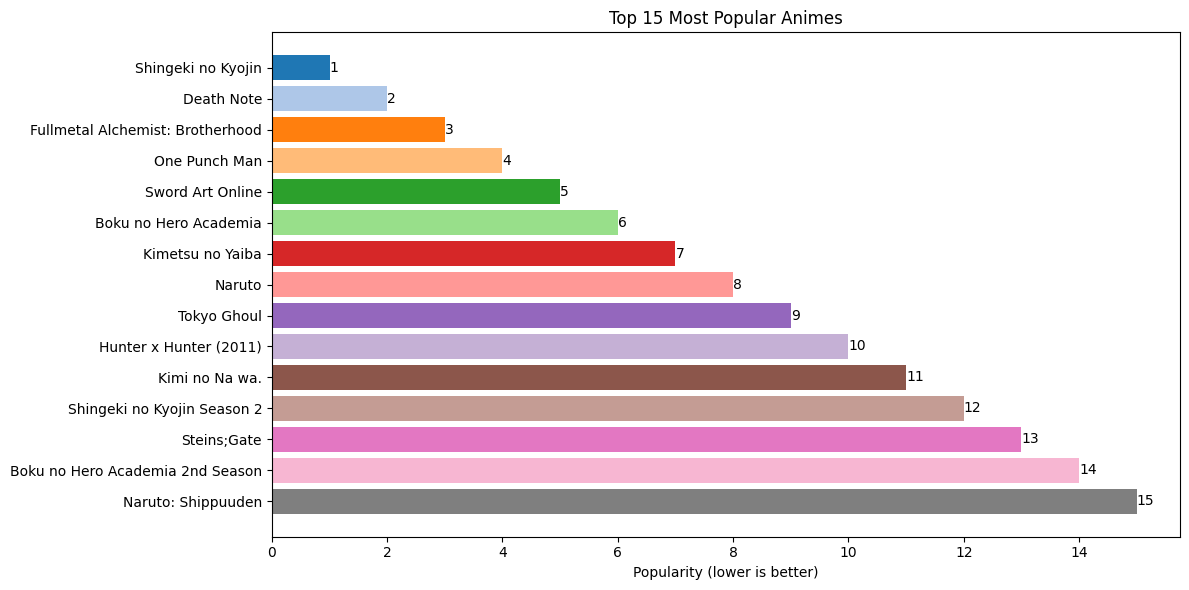

In [44]:
df_valid_popularity = df_anime[df_anime['Popularity'] > 0]

top_15_popular = df_valid_popularity.sort_values(by='Popularity', ascending=True).head(15)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_15_popular['Name'], top_15_popular['Popularity'], color=plt.cm.tab20.colors)

plt.xlabel('Popularity (lower is better)')
plt.title('Top 15 Most Popular Animes')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()

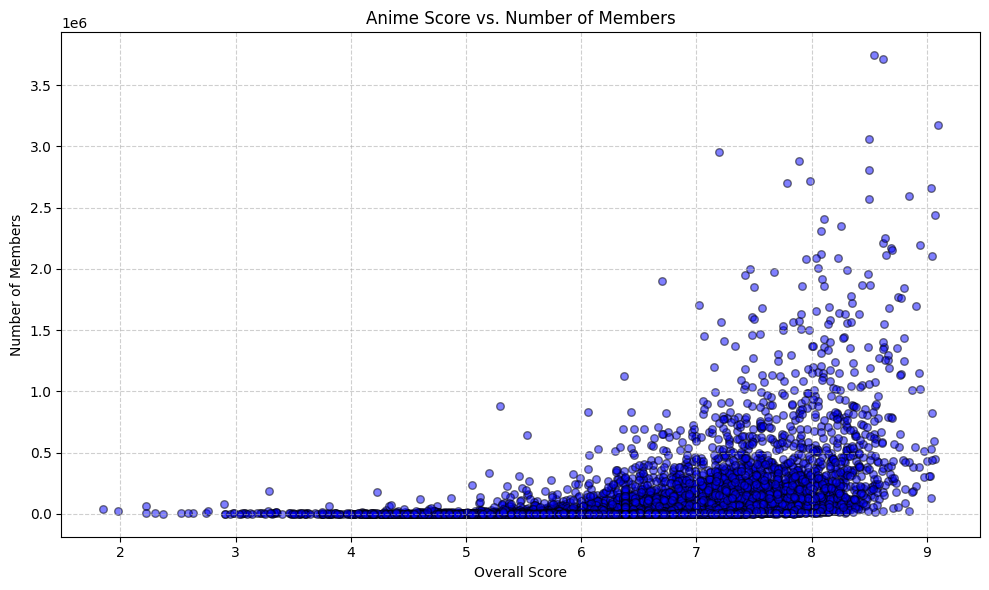

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df_anime['Score'],
    y=df_anime['Members'],
    alpha=0.5,
    color='blue',
    edgecolors='black',
    s=30  
)

plt.xlabel('Overall Score')
plt.ylabel('Number of Members')
plt.title('Anime Score vs. Number of Members')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 

plt.show()

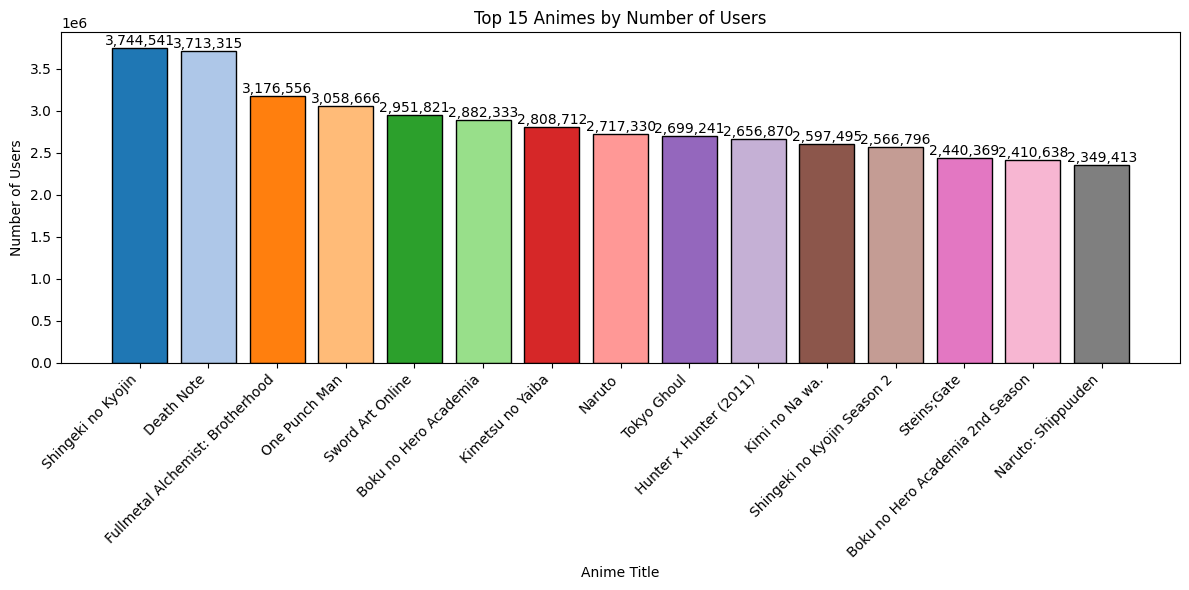

In [46]:
top_15_scored = df_anime.sort_values(by='Members', ascending=False).head(15)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_15_scored['Name'], top_15_scored['Members'], 
               color=plt.cm.tab20.colors, edgecolor='black')

plt.xlabel('Anime Title')
plt.ylabel('Number of Users')
plt.title('Top 15 Animes by Number of Users')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

plt.tight_layout() 
plt.show()

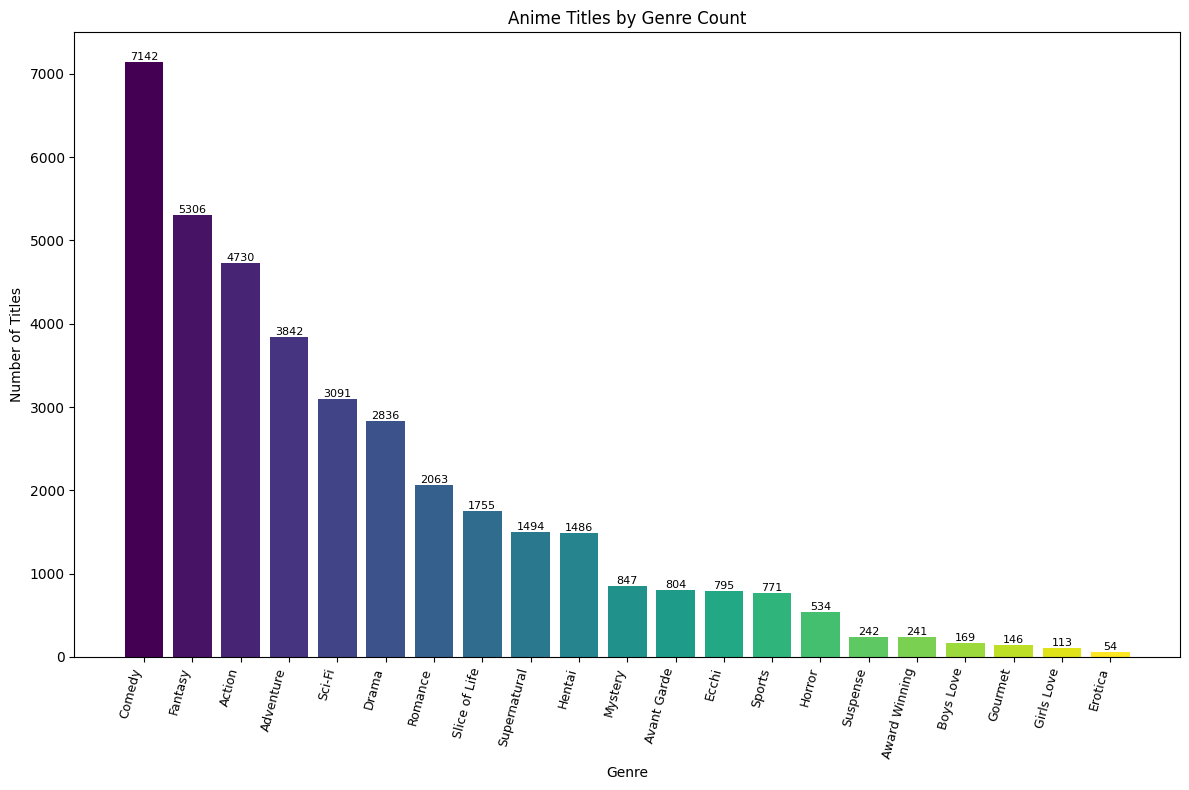

In [47]:
df_genres = df_anime[df_anime['Genres'] != "UNKNOWN"].copy()
genre_counts = df_genres['Genres'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 8))

bars = plt.bar(genre_counts.index, genre_counts.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(genre_counts))))

plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Anime Titles by Genre Count')
plt.xticks(rotation=75, ha='right', fontsize=9)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom',
             fontsize=8)

plt.tight_layout()
plt.show()

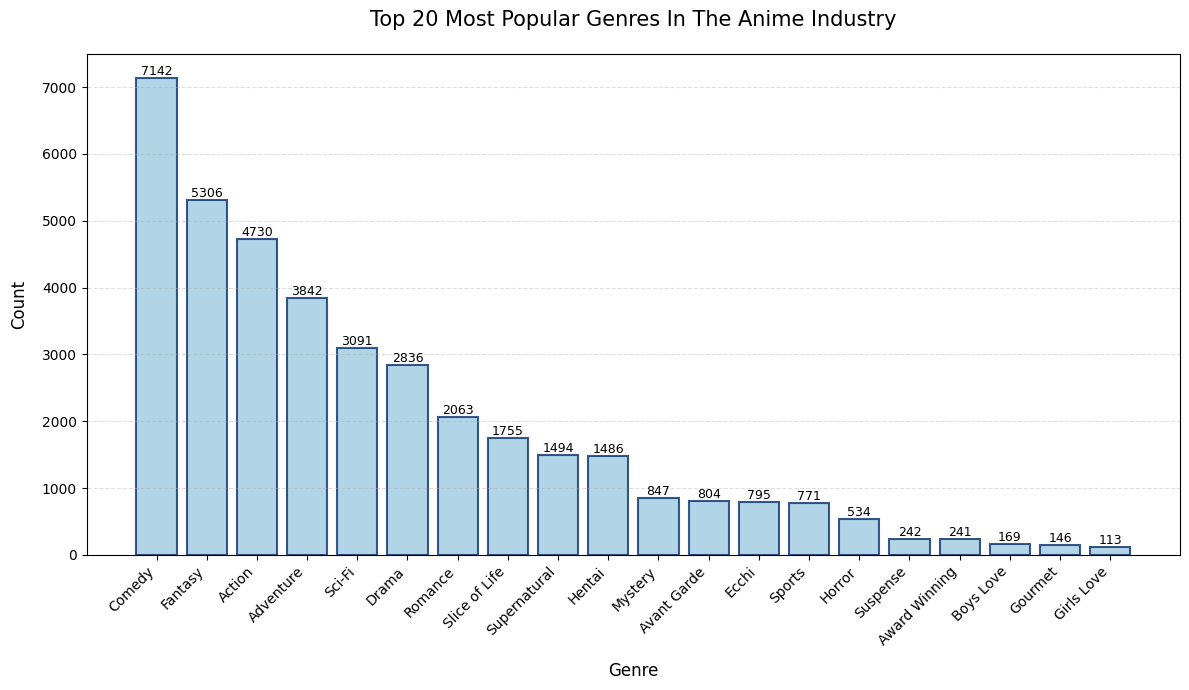

In [50]:
top_20_genres = genre_counts.head(20)

plt.figure(figsize=(12, 7))
bars = plt.bar(top_20_genres.index, top_20_genres.values,
               color='#9ECAE1',  
               edgecolor='#08306B',
               linewidth=1.5,
               alpha=0.8)

plt.title('Top 20 Most Popular Genres In The Anime Industry', pad=20, fontsize=15)
plt.xlabel('Genre', labelpad=10, fontsize=12)
plt.ylabel('Count', labelpad=10, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             int(height),
             ha='center', va='bottom',
             fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

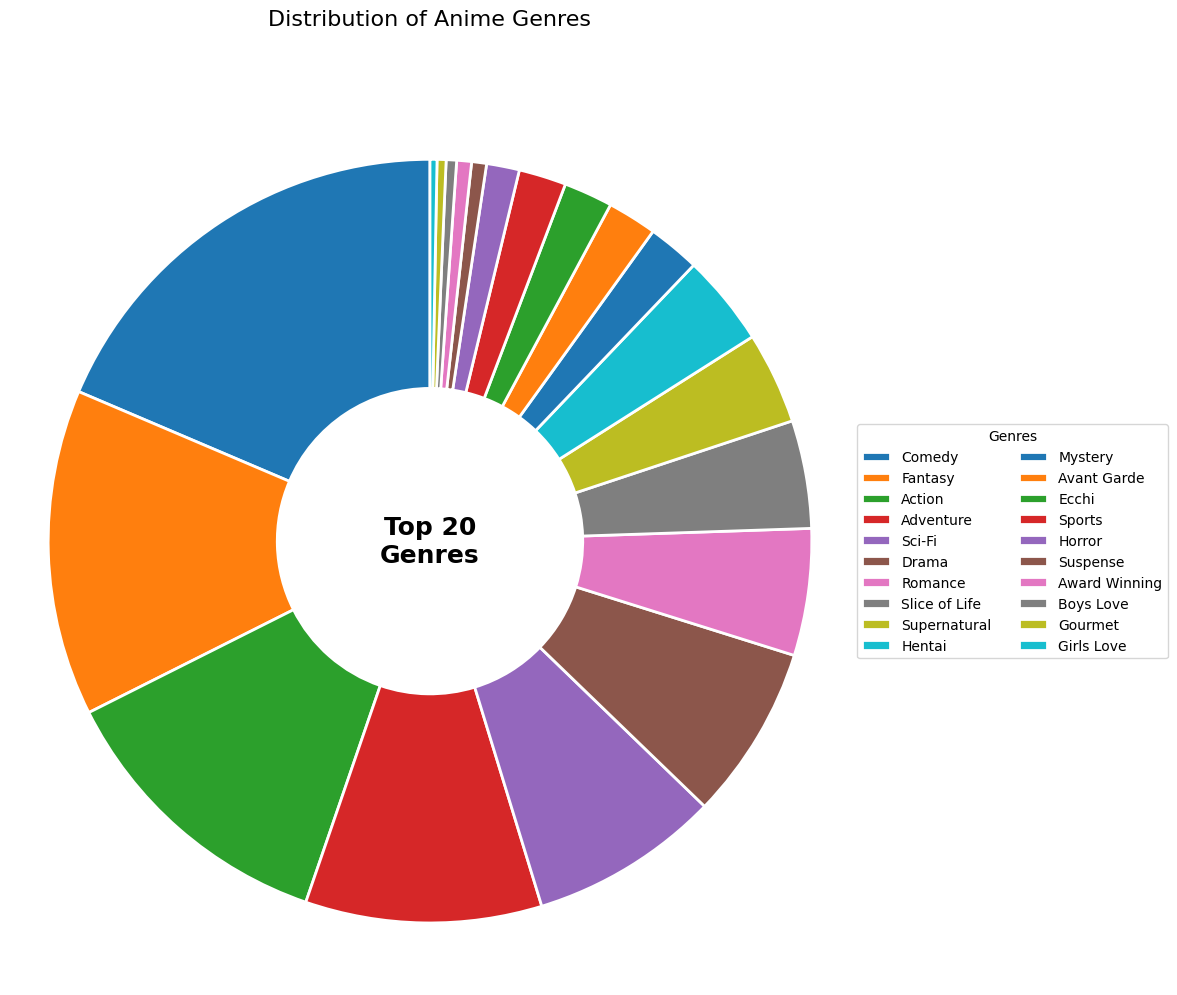

In [56]:
plt.figure(figsize=(14, 10))
wedges, autotexts = plt.pie(top_20_genres.values,
                          labels=None,
                          startangle=90,
                          pctdistance=0.8,
                          wedgeprops={'width':0.6, 'edgecolor':'white', 'linewidth':2},
                          textprops={'fontsize':10, 'color':'black', 'weight':'bold'})

plt.legend(wedges, top_20_genres.index,
          title='Genres',
          loc='center left',
          bbox_to_anchor=(1, 0.5),
          prop={'size':10},
          ncol=2)

plt.title('Distribution of Anime Genres', fontsize=16, pad=20, y=1.05)
centre_circle = plt.Circle((0,0), 0.4, fc='white')
plt.gca().add_artist(centre_circle)
plt.text(0, 0, 'Top 20\nGenres', ha='center', va='center', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)
plt.axis('equal')
plt.show()

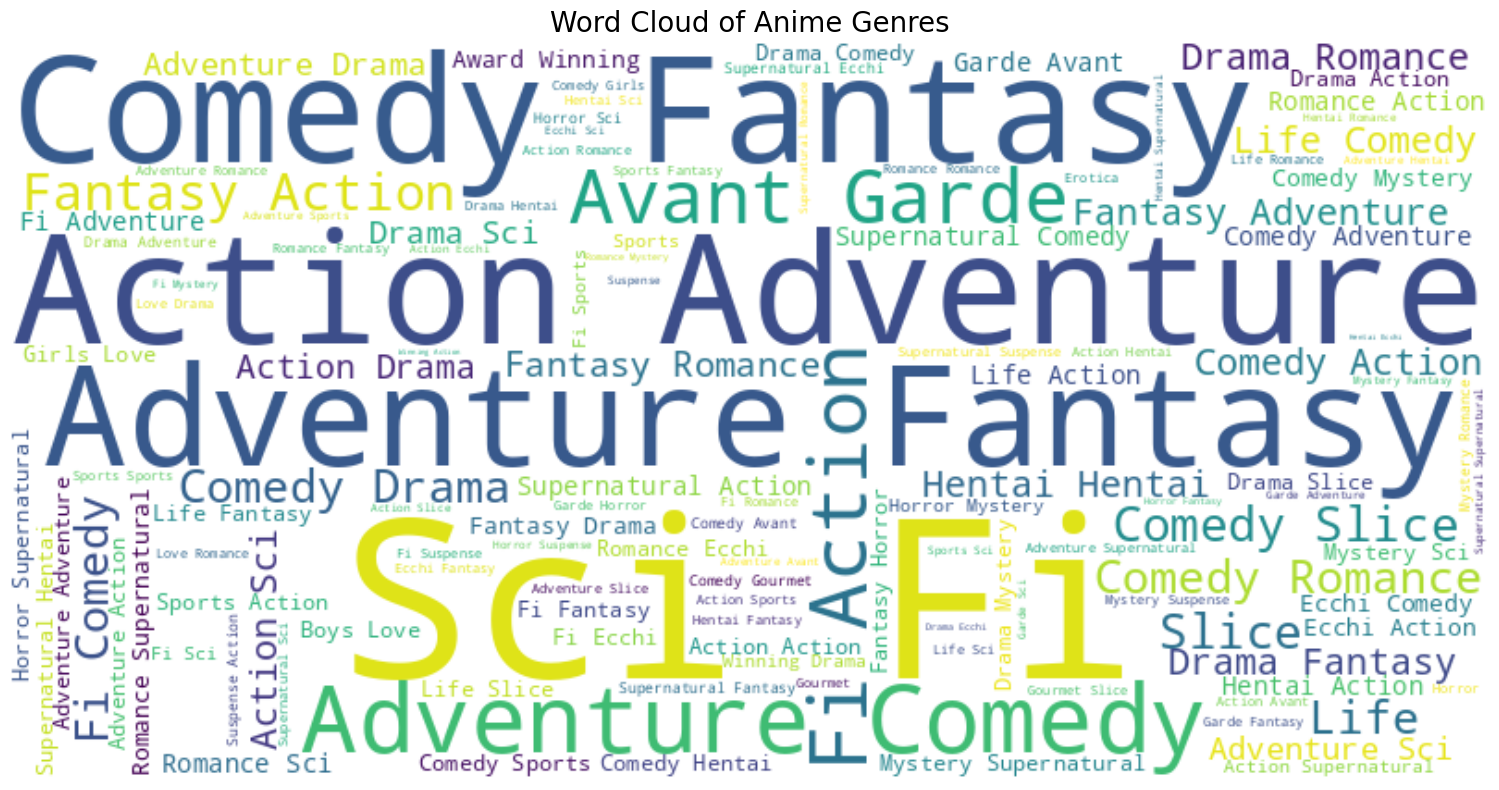

In [58]:
genre_text = ' '.join(df_anime[df_anime['Genres'] != "UNKNOWN"]['Genres'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Genres', fontsize=20)
plt.tight_layout()
plt.show()

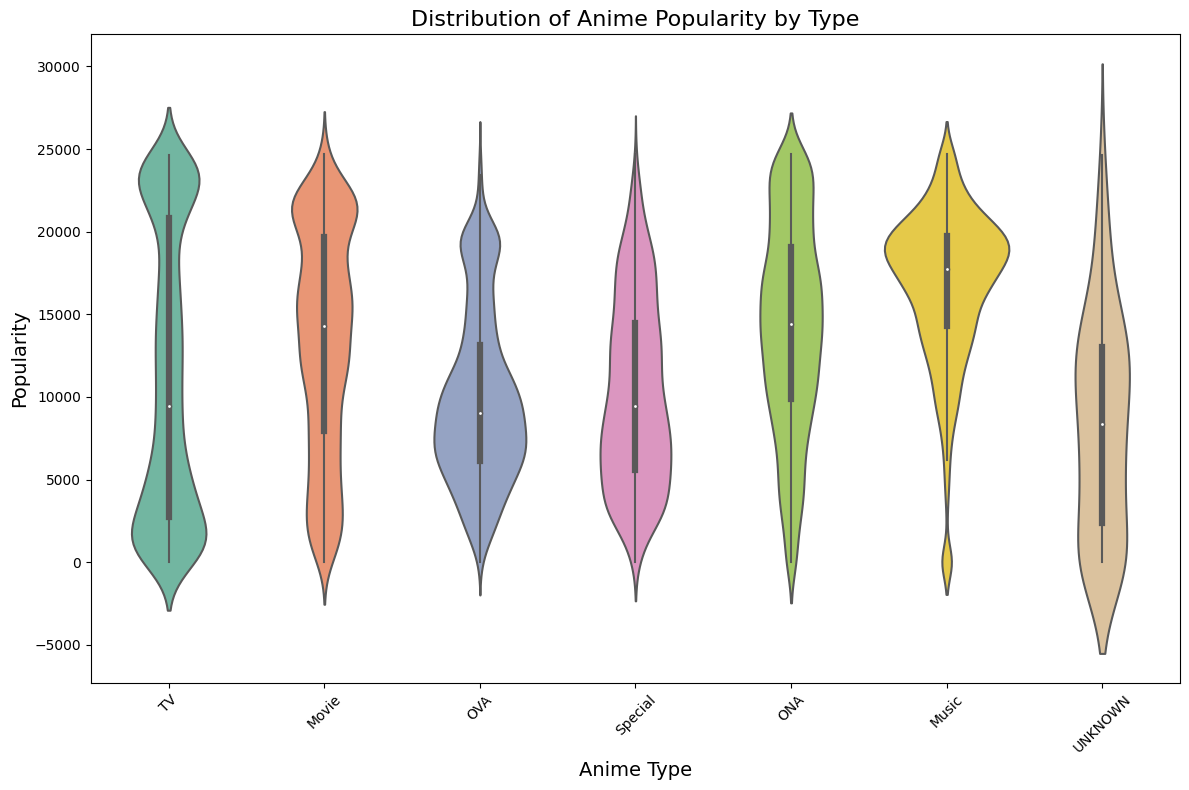

In [63]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type', y='Popularity', data=df_anime, palette='Set2')
plt.title('Distribution of Anime Popularity by Type', fontsize=16)
plt.xlabel('Anime Type', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

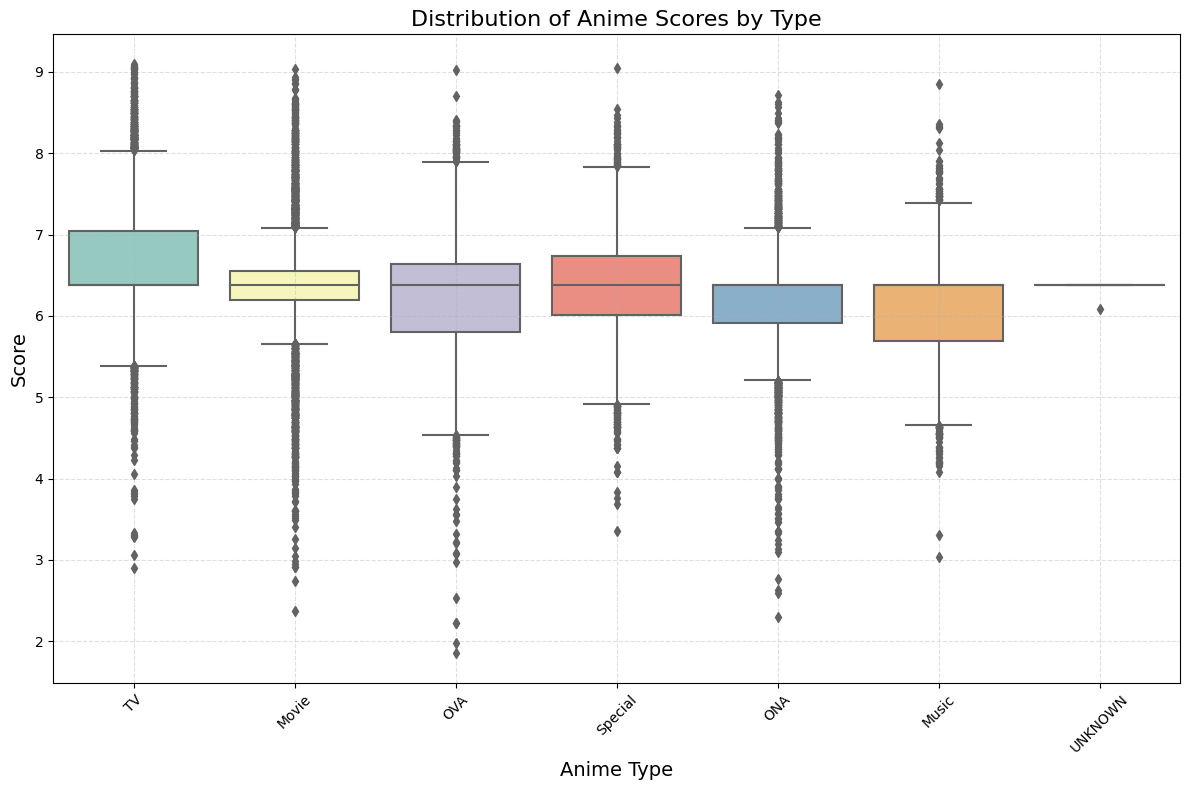

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Score', data=df_anime, palette='Set3')
plt.title('Distribution of Anime Scores by Type', fontsize=16)
plt.xlabel('Anime Type', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

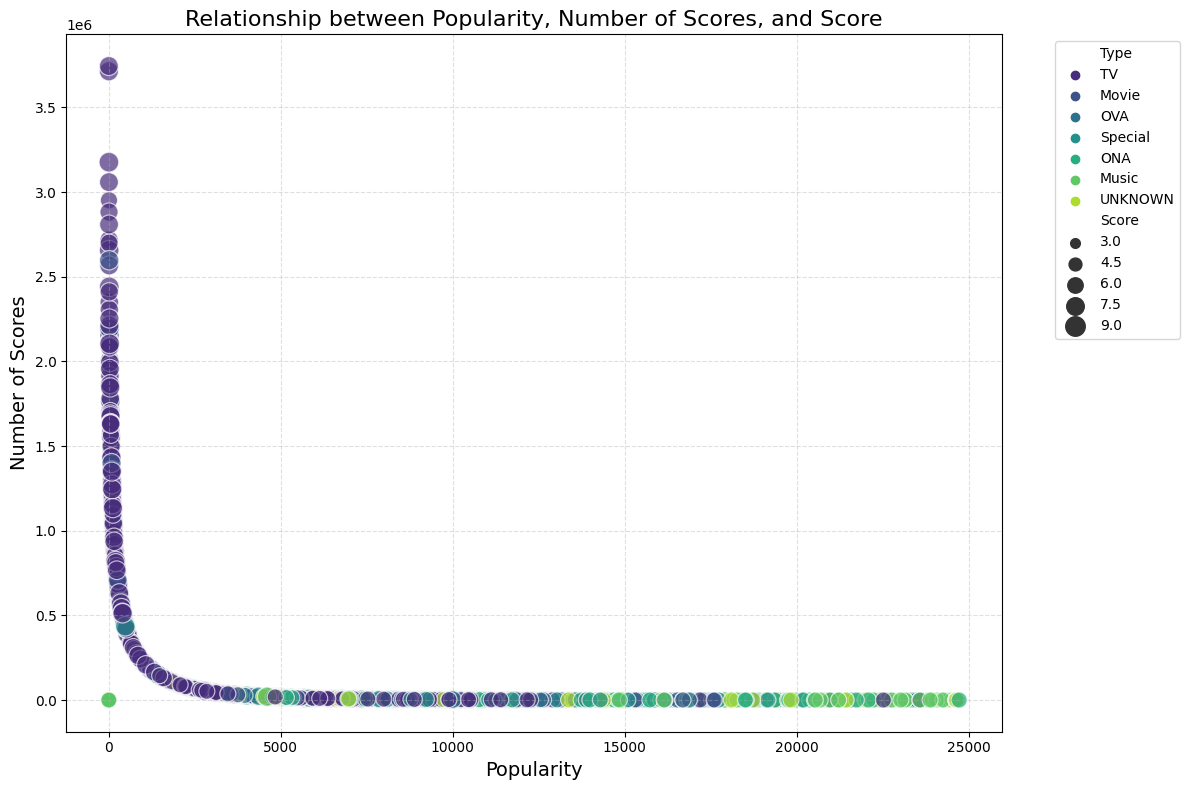

In [65]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Popularity', y='Members', size='Score', hue='Type', 
                          data=df_anime, sizes=(20, 200), alpha=0.7, palette='viridis')

plt.title('Relationship between Popularity, Number of Scores, and Score', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Number of Scores', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

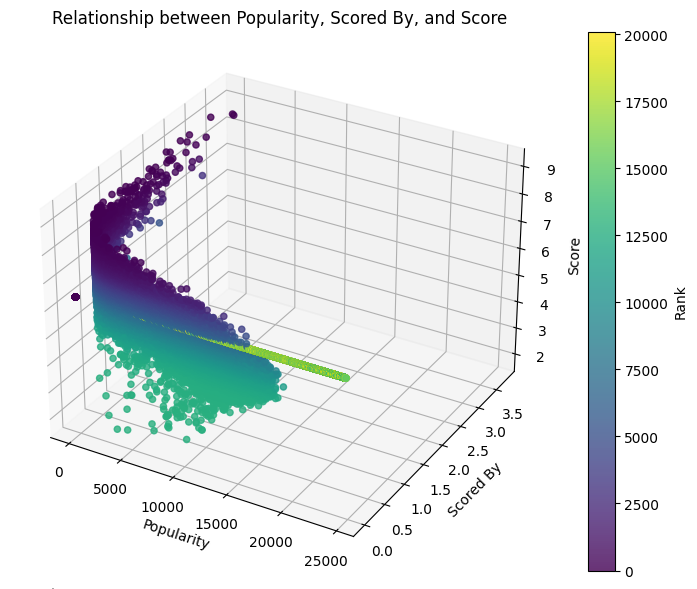

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_anime['Popularity'],
    df_anime['Members'],
    df_anime['Score'],
    c=df_anime['Rank'],
    cmap='viridis',
    s=20,
    alpha=0.8
)

ax.set_xlabel('Popularity')
ax.set_ylabel('Scored By')
ax.set_zlabel('Score')
plt.title('Relationship between Popularity, Scored By, and Score')
fig.colorbar(scatter, ax=ax, label='Rank')
plt.show()


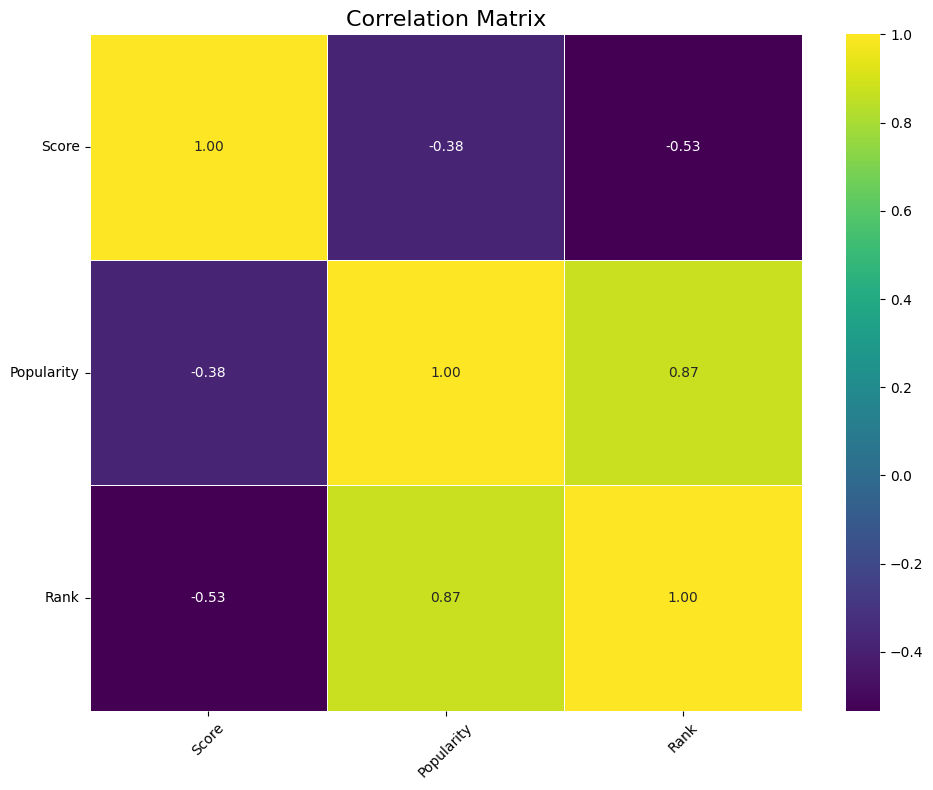

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_anime[['Score', 'Popularity', 'Rank']].corr(), 
            annot=True, 
            cmap='viridis', 
            fmt='.2f', 
            linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
df_anime['Licensors'].value_counts()

Licensors
UNKNOWN                                    20170
Funimation                                   957
Sentai Filmworks                             818
Discotek Media                               275
Aniplex of America                           222
                                           ...  
Geneon Universal Entertainment                 1
VIZ Media, Warner Bros. Pictures               1
Ketchup Entertainment                          1
Kadokawa                                       1
Funimation, Discotek Media, Crunchyroll        1
Name: count, Length: 265, dtype: int64

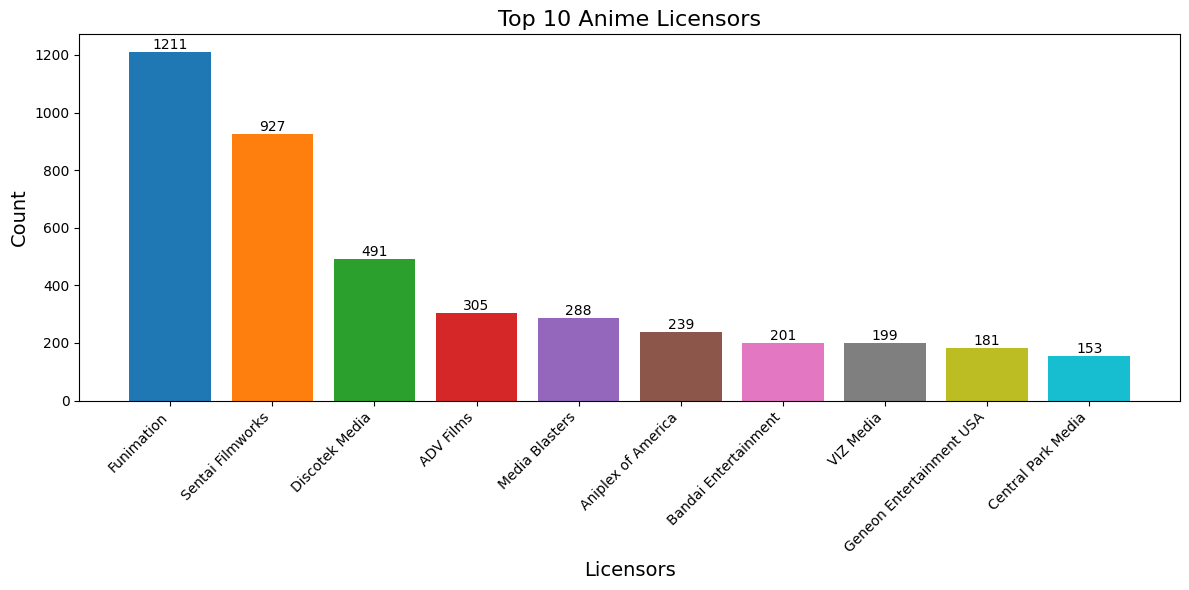

In [71]:
licensors_list = [licensor.strip() for licensors in df_anime[df_anime['Licensors']!="UNKNOWN"]['Licensors'].str.split(',') for licensor in licensors]
licensor_counts = pd.Series(licensors_list).value_counts()
filtered_licensor_counts = licensor_counts[licensor_counts.index != 'Unknown']
top_10_licensors = filtered_licensor_counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_licensors.index, top_10_licensors.values, color=plt.cm.tab10.colors)
plt.title('Top 10 Anime Licensors', fontsize=16)
plt.xlabel('Licensors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [72]:
df_anime['Premiered'].value_counts()

Premiered
UNKNOWN        19399
spring 2017       88
fall 2016         83
spring 2018       81
spring 2016       78
               ...  
winter 1963        1
summer 1981        1
winter 1985        1
winter 1974        1
summer 2025        1
Name: count, Length: 244, dtype: int64

In [73]:
def extract_season_year(premiered):
    if premiered == 'UNKNOWN':
        return None, None
    else:
        season, year = premiered.split()
        return season, int(year)

season_year = df_anime['Premiered'].map(extract_season_year)
premiered_season = season_year.apply(lambda x: x[0])
premiered_Year = season_year.apply(lambda x: x[1])

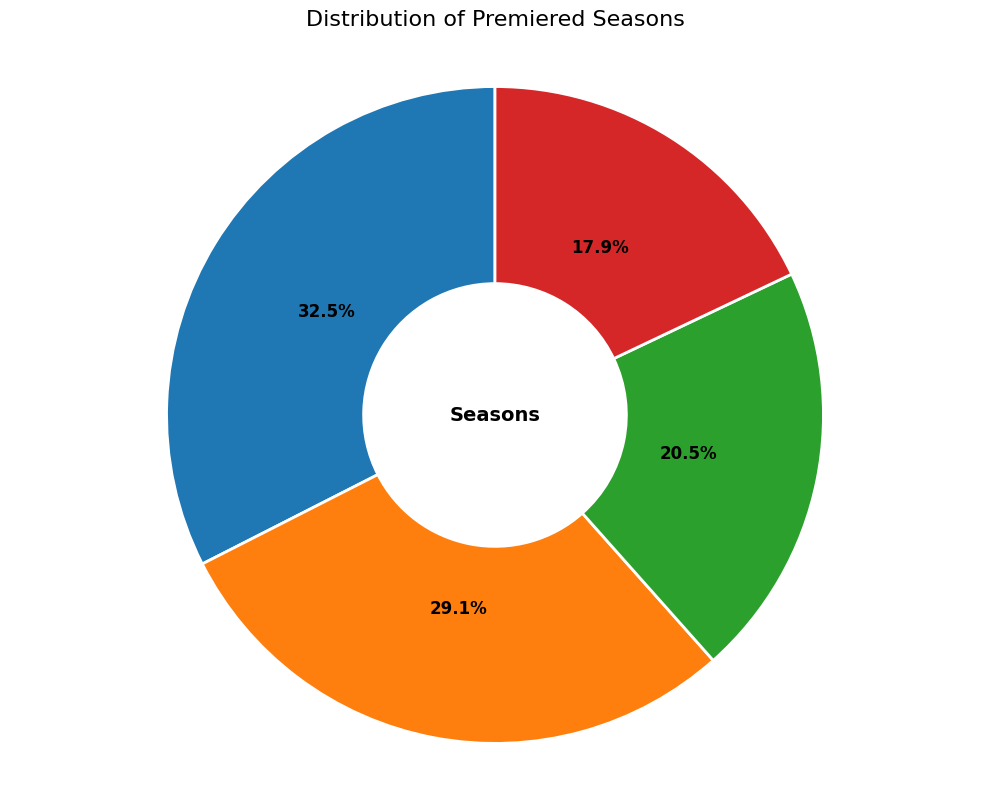

In [74]:
filtered_premiered_season = premiered_season.dropna()
season_counts = filtered_premiered_season.value_counts()

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(season_counts.values,
                                  labels=season_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  wedgeprops={'width': 0.6, 'edgecolor': 'white', 'linewidth': 2},
                                  colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
                                  textprops={'fontsize': 12, 'color': 'white'})

plt.setp(autotexts, size=12, weight='bold', color='black')
plt.title('Distribution of Premiered Seasons', fontsize=16, pad=20)
plt.axis('equal')

centre_circle = plt.Circle((0,0), 0.3, fc='white')
plt.gca().add_artist(centre_circle)
plt.text(0, 0, 'Seasons', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

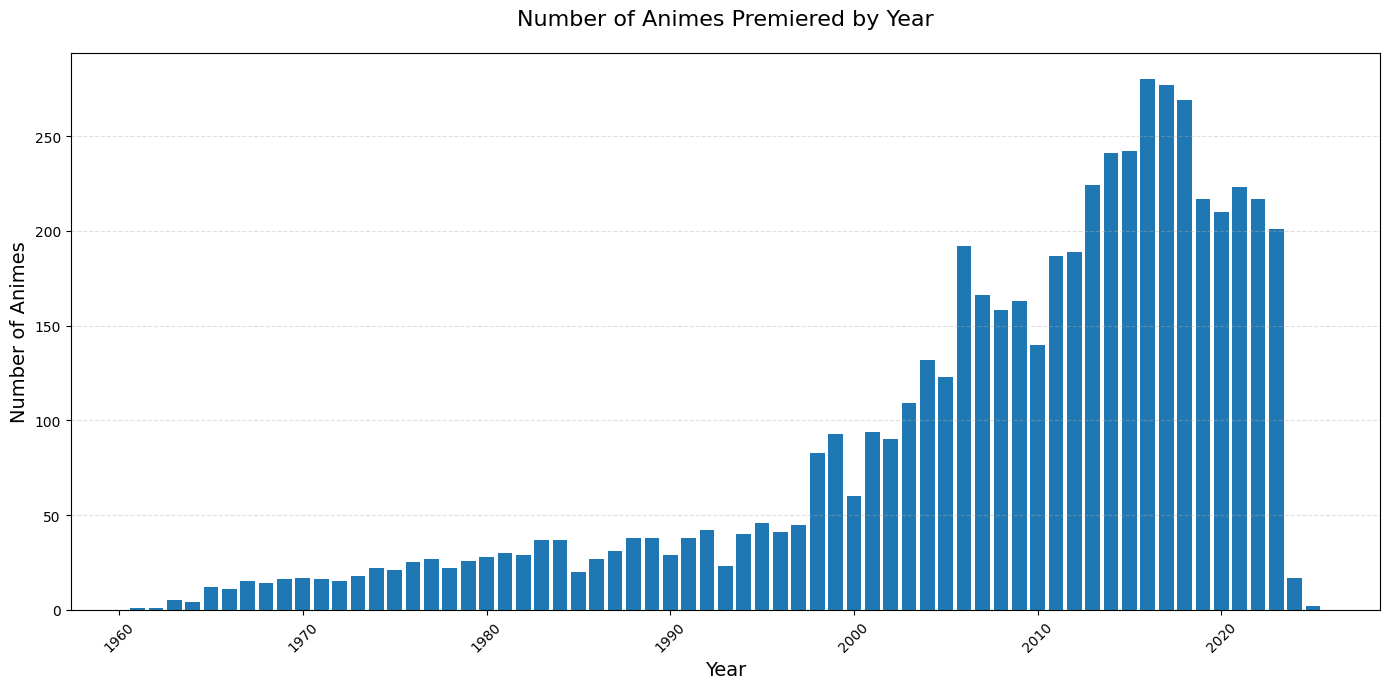

In [75]:
filtered_premiered_year = premiered_Year.dropna()
year_counts = filtered_premiered_year.value_counts()
sorted_years = sorted(year_counts.index)

plt.figure(figsize=(14, 7))
plt.bar(sorted_years, year_counts[sorted_years], color='#1f77b4', width=0.8)
plt.title('Number of Animes Premiered by Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Animes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

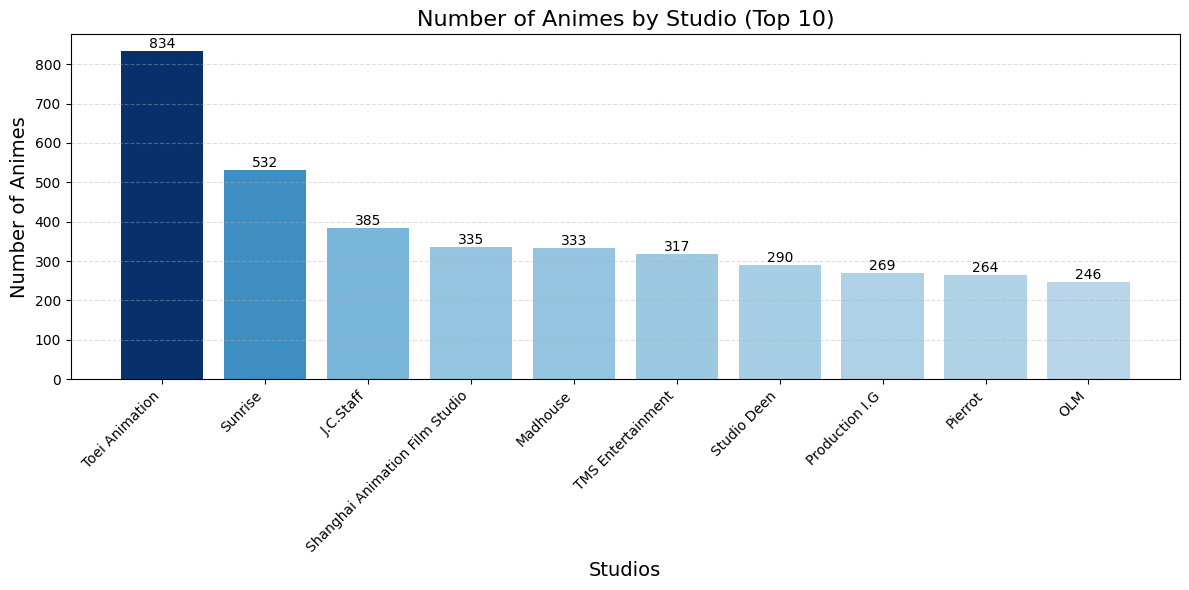

In [76]:
import matplotlib.pyplot as plt

studio_counts = df_anime['Studios'].value_counts()
studio_counts = studio_counts[studio_counts.index != 'UNKNOWN']
top_studios = studio_counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_studios.index, top_studios.values, 
              color=plt.cm.Blues(top_studios.values/top_studios.values.max()))

plt.title('Number of Animes by Studio (Top 10)', fontsize=16)
plt.xlabel('Studios', fontsize=14)
plt.ylabel('Number of Animes', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

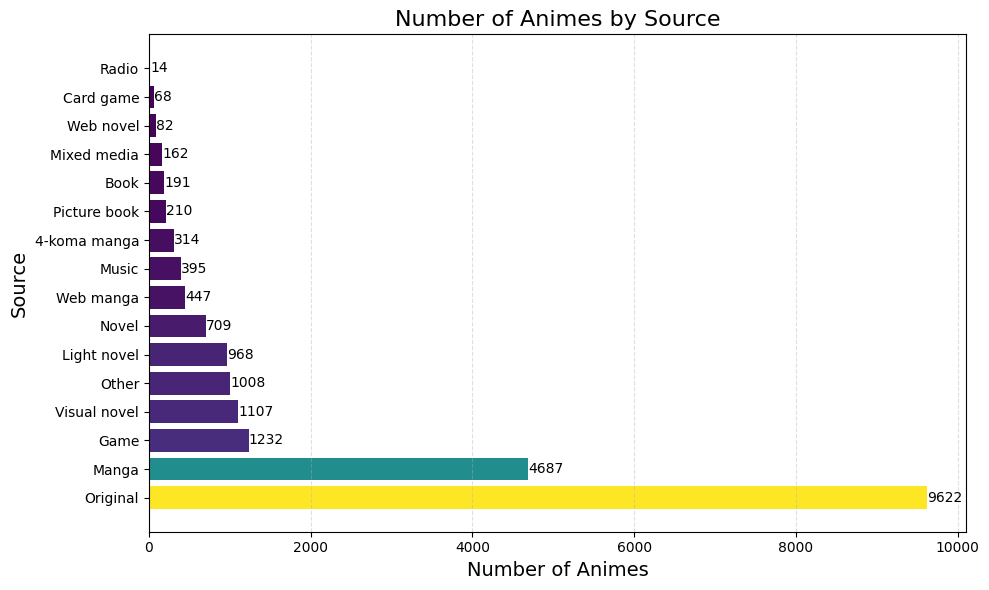

In [78]:
import matplotlib.pyplot as plt

source_counts = df_anime['Source'].value_counts()
source_counts = source_counts[source_counts.index != 'Unknown']

plt.figure(figsize=(10, 6))
bars = plt.barh(source_counts.index, source_counts.values, 
               color=plt.cm.viridis(source_counts.values/source_counts.values.max()))

plt.title('Number of Animes by Source', fontsize=16)
plt.xlabel('Number of Animes', fontsize=14)
plt.ylabel('Source', fontsize=14)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width}',
             va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

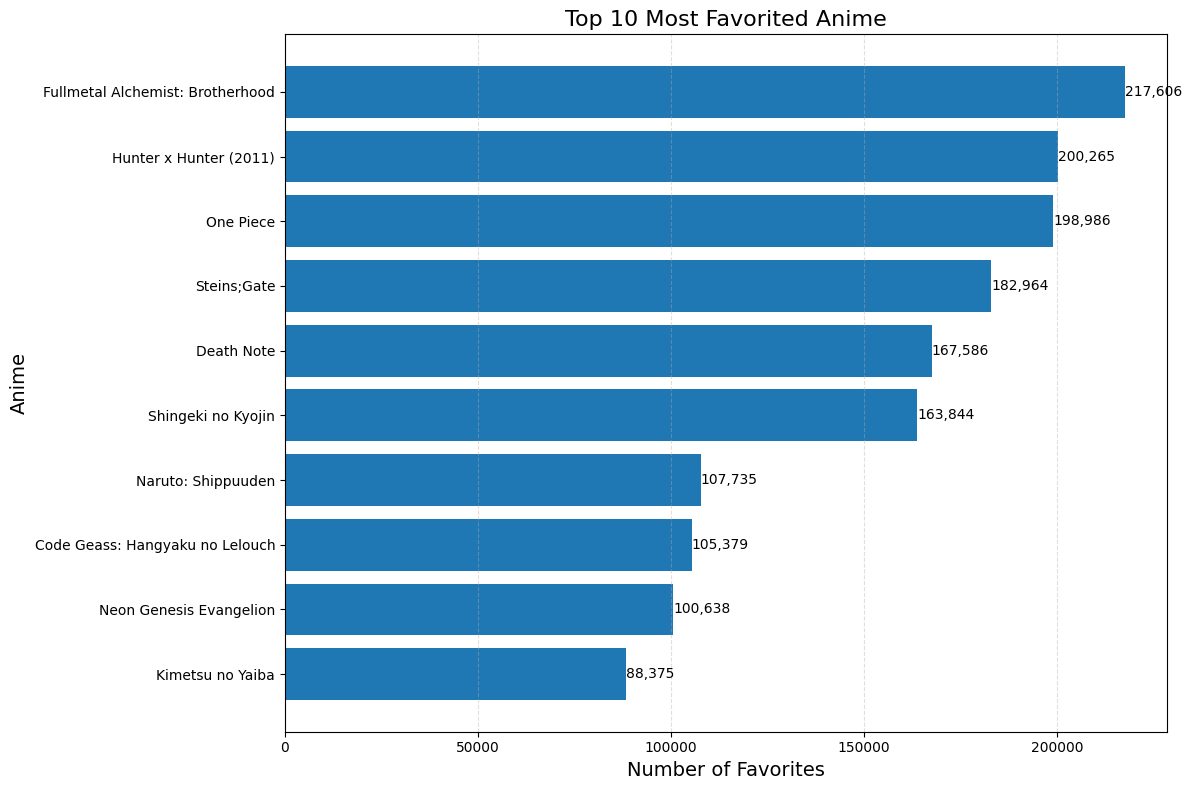

In [79]:
top_favorites = df_anime.sort_values('Favorites', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_favorites['Name'], top_favorites['Favorites'], color='#1f77b4')

plt.title('Top 10 Most Favorited Anime', fontsize=16)
plt.xlabel('Number of Favorites', fontsize=14)
plt.ylabel('Anime', fontsize=14)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:,}',  
             va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

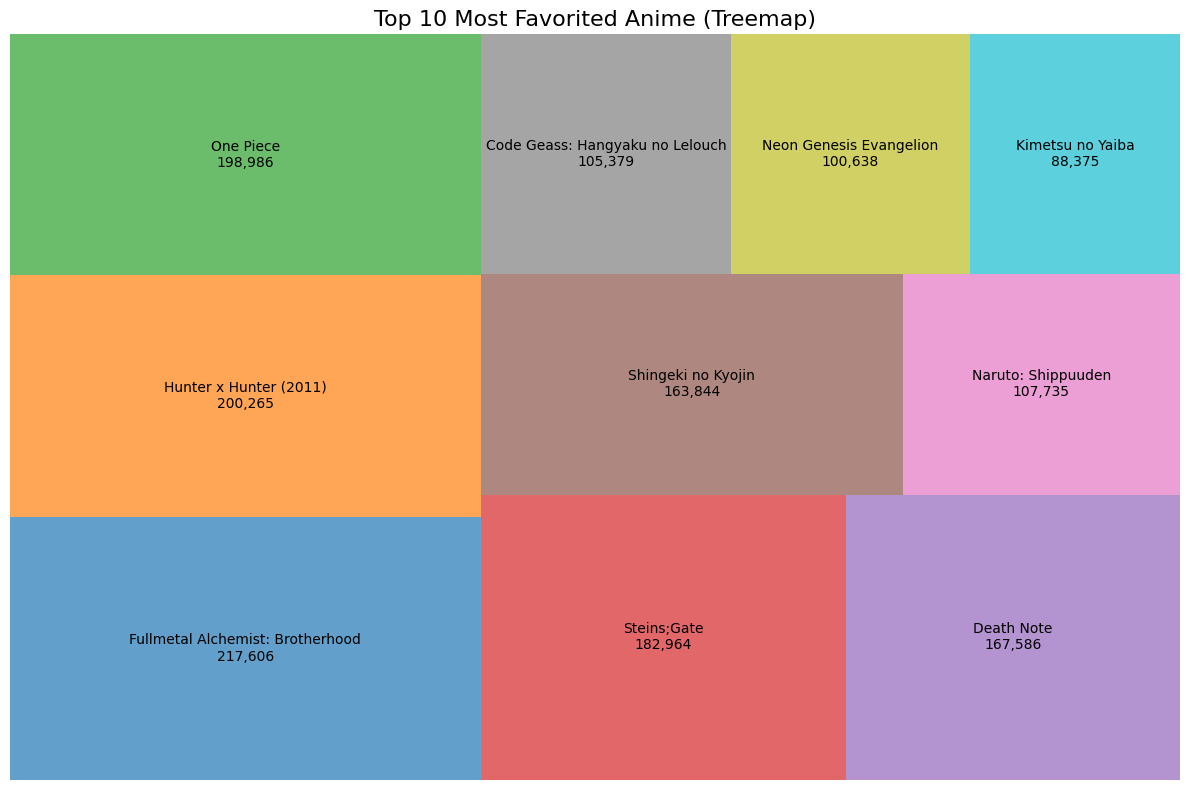

In [80]:
import squarify

top_favorites = df_anime.sort_values('Favorites', ascending=False).head(10)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_favorites['Favorites'],
              label=[f"{name}\n{fav:,}" for name, fav in zip(top_favorites['Name'], top_favorites['Favorites'])],
              color=colors,
              alpha=0.7,
              text_kwargs={'fontsize':10})

plt.title('Top 10 Most Favorited Anime (Treemap)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

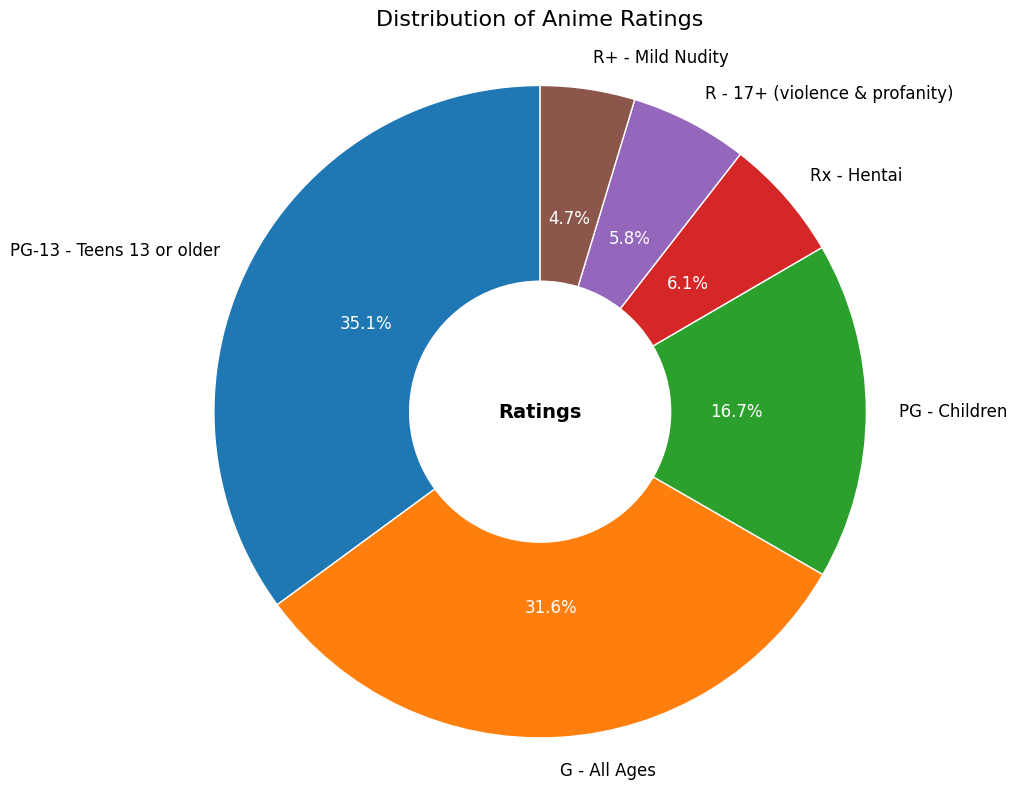

In [84]:
import matplotlib.pyplot as plt

rating_counts = df_anime[df_anime['Rating']!="UNKNOWN"]['Rating'].value_counts()
rating_counts = rating_counts[rating_counts.index != 'Unknown']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(rating_counts.values,
                                  labels=rating_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  wedgeprops={'width': 0.6, 'edgecolor': 'white'},
                                  textprops={'fontsize': 12})

plt.setp(autotexts, size=12, color='white')
plt.title('Distribution of Anime Ratings', fontsize=16, pad=20)
plt.axis('equal')

centre_circle = plt.Circle((0,0), 0.3, fc='white')
plt.gca().add_artist(centre_circle)
plt.text(0, 0, 'Ratings', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
def map_language_code(code):
    language_mapping = {
        'ja': 'Japanese',
        'ko': 'Korean',
        'zh-cn': 'Simplified Chinese',
        'de': 'German',
        'vi': 'Vietnamese',
        'en': 'English',
        'zh-tw': 'Traditional Chinese'
    }
    return language_mapping.get(code, 'Other')

def detect_language(name):
    try:
        return detect(name)
    except:
        return None 

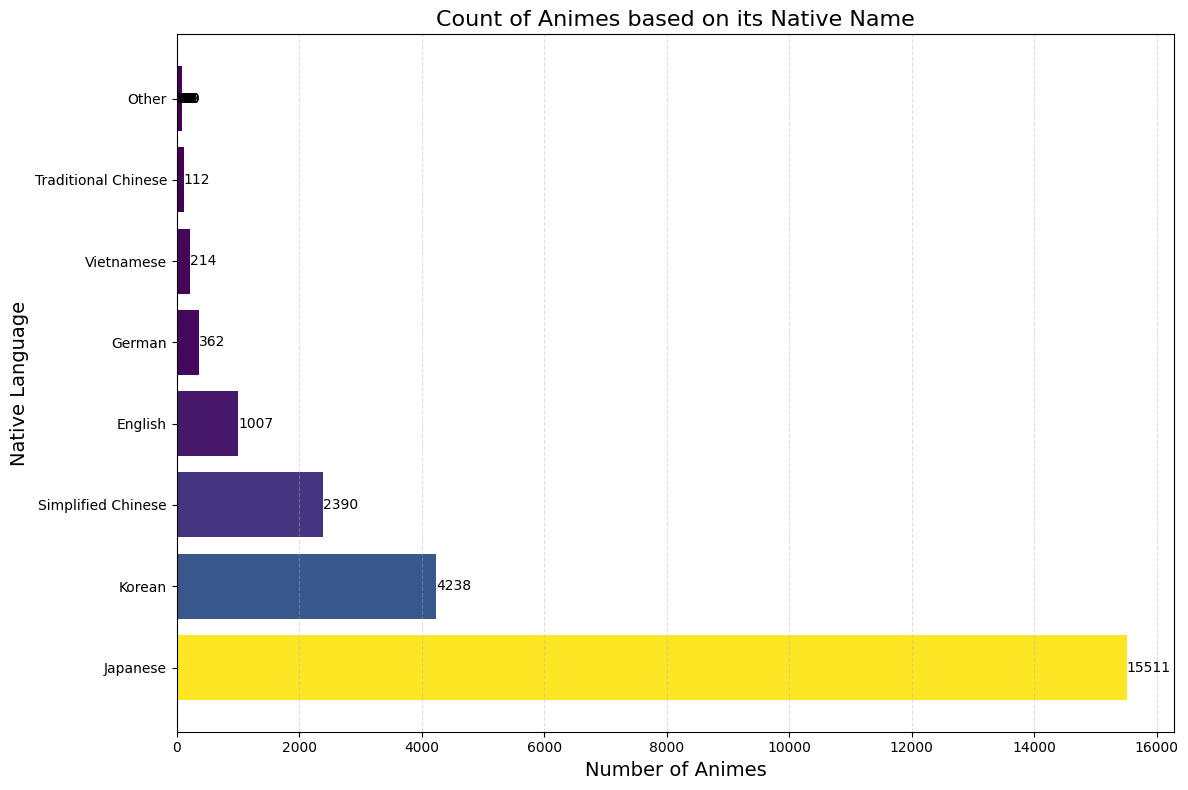

In [86]:
Detected_Language = df_anime[df_anime['Other name']!="UNKNOWN"]['Other name'].apply(detect_language)

Detected_Language = Detected_Language.dropna()


language_counts = Detected_Language.value_counts()

language_counts.index = language_counts.index.map(map_language_code)


plt.figure(figsize=(12, 8))
bars = plt.barh(language_counts.index, language_counts.values, 
               color=plt.cm.viridis(language_counts.values/language_counts.values.max()))

plt.title('Count of Animes based on its Native Name', fontsize=16)
plt.xlabel('Number of Animes', fontsize=14)
plt.ylabel('Native Language', fontsize=14)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width}',
             va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### For User Dataset

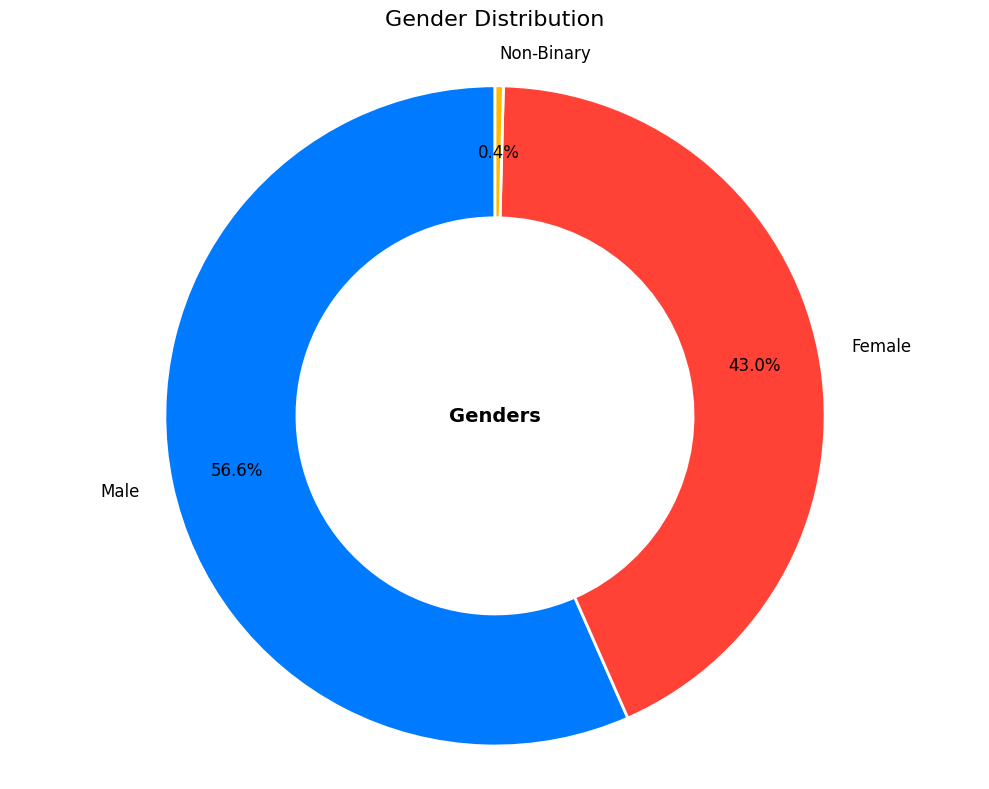

In [88]:
gender_counts = df_user['Gender'].value_counts(dropna=True)
colors = ['#007BFF', '#FF4136', '#FFBB00', '#7D7D7D']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    colors=colors,
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 2},
    autopct='%1.1f%%',
    pctdistance=0.8,
    textprops={'fontsize': 12}
)

plt.title('Gender Distribution', fontsize=16, pad=20)
plt.axis('equal')

centre_circle = plt.Circle((0,0), 0.2, fc='white')
plt.gca().add_artist(centre_circle)

plt.text(0, 0, 'Genders', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [89]:
df_user['Birthday'].value_counts(dropna=True)

Birthday
1990-01-01T00:00:00+00:00    177
1989-03-26T00:00:00+00:00    169
1980-01-01T00:00:00+00:00    166
1930-01-01T00:00:00+00:00    153
1991-01-01T00:00:00+00:00    115
                            ... 
1977-01-13T00:00:00+00:00      1
1976-08-10T00:00:00+00:00      1
1979-12-30T00:00:00+00:00      1
1978-03-18T00:00:00+00:00      1
1978-05-23T00:00:00+00:00      1
Name: count, Length: 11247, dtype: int64

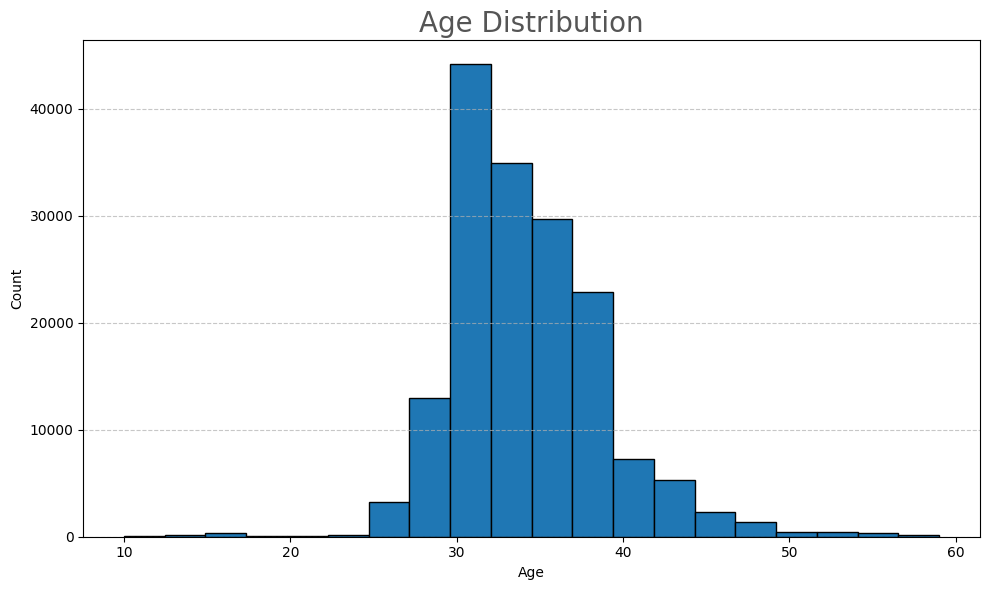

In [90]:
from datetime import datetime

def calculate_age(birth_date):
    if birth_date != 'NaN':
        try:
            birth_year = int(birth_date.split('-')[0])
            today_year = datetime.utcnow().year
            age = today_year - birth_year
            if age >= 10 and age < 60: 
                return age
            else:
                return None
        except:
            return None
    return None

Age = df_user['Birthday'].dropna().apply(calculate_age).dropna()

plt.figure(figsize=(10, 6))
plt.hist(Age, bins=20, color='#1f77b4', edgecolor='black')
plt.title('Age Distribution', fontsize=20, color='#555555')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

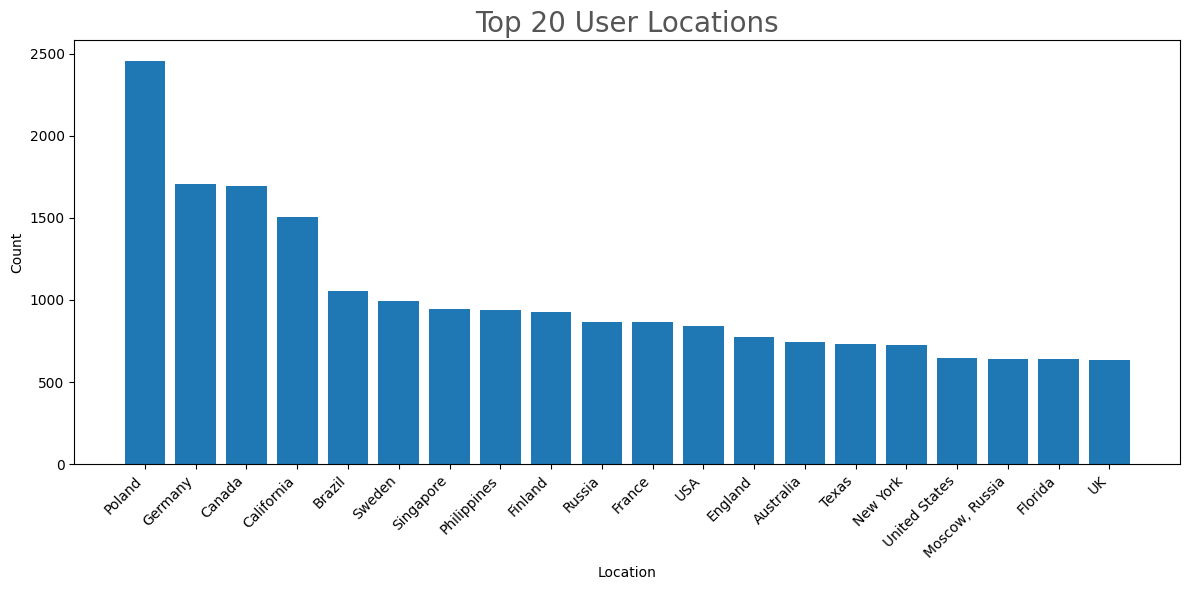

In [91]:
location_counts = df_user['Location'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values, color='#1f77b4')
plt.title('Top 20 User Locations', fontsize=20, color='#555555')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

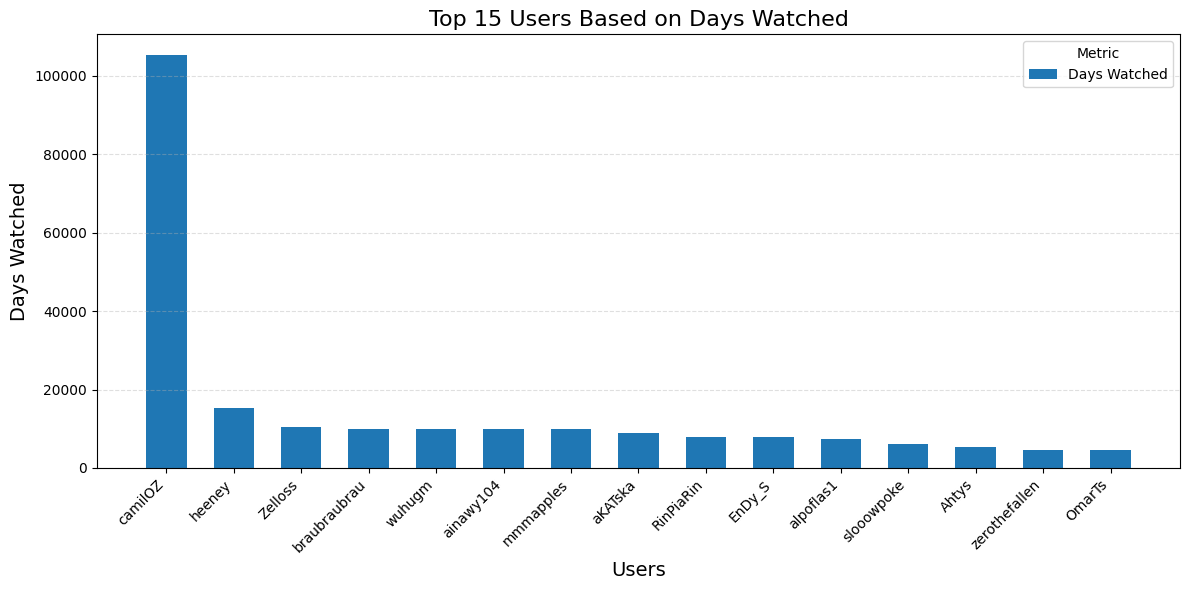

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = ['Days Watched']
top_users = pd.concat([df_user.nlargest(15, metric) for metric in metrics], ignore_index=True)

plt.figure(figsize=(12, 6))
bar_width = 0.6
positions = range(len(top_users))

for i, metric in enumerate(metrics):
    plt.bar(positions, top_users[metric], width=bar_width, 
            label=metric, color=plt.cm.tab10(i))

plt.title('Top 15 Users Based on Days Watched', fontsize=16)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Days Watched', fontsize=14)
plt.xticks(positions, top_users['Username'], rotation=45, ha='right')
plt.legend(title='Metric')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

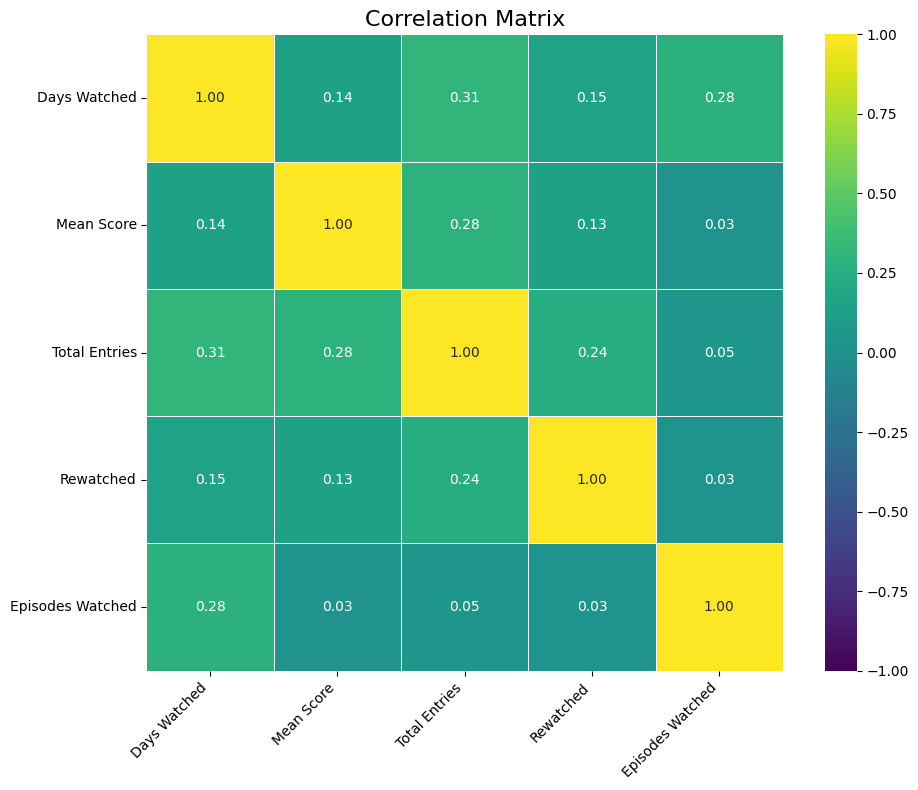

In [94]:
correlation_matrix = df_user[['Days Watched', 'Mean Score', 'Total Entries', 'Rewatched', 'Episodes Watched']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='viridis', 
            fmt='.2f', 
            linewidths=0.5,
            vmin=-1, 
            vmax=1,
            square=True)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### For User Score Dataset

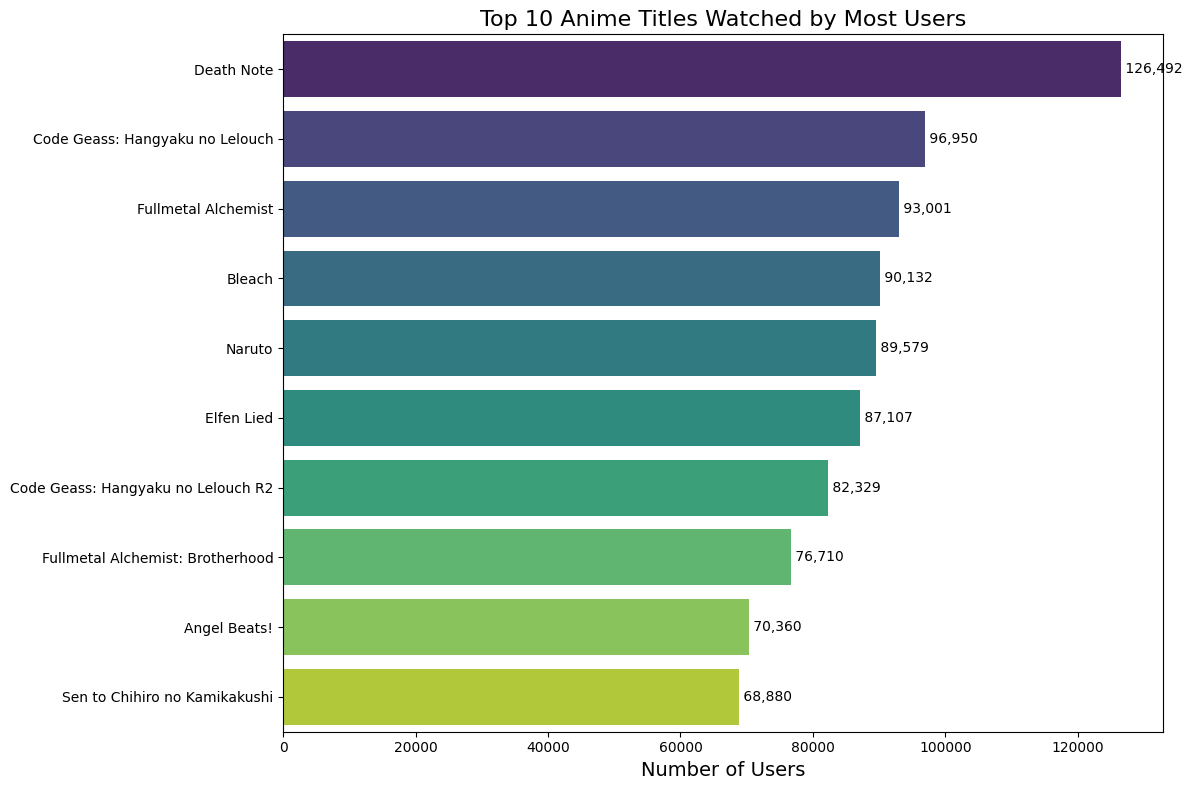

In [95]:
anime_watch_count = df_score.groupby('Anime Title')['user_id'].nunique().reset_index()
anime_watch_count = anime_watch_count.rename(columns={'user_id': 'User Count'})
top_anime_watch_count = anime_watch_count.sort_values('User Count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='User Count', y='Anime Title', 
                     data=top_anime_watch_count,
                     palette='viridis')

for i, (value, name) in enumerate(zip(top_anime_watch_count['User Count'], 
                                    top_anime_watch_count['Anime Title'])):
    plt.text(value, i, f' {value:,}', 
            va='center', ha='left', fontsize=10)

plt.title('Top 10 Anime Titles Watched by Most Users', fontsize=16)
plt.xlabel('Number of Users', fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()